<a href="https://www.kaggle.com/code/simronw/customer-segmentation-eda-and-clustering?scriptVersionId=181303048" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Let's connect on** [Linkedin](https://www.linkedin.com/in/simronwaskar/)

# **Customer Segmentation EDA and Clustering**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


# *Collect the data*

In [2]:
#Importing the dataset into Pandas Dataframe
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [3]:
# Displaying first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Understanding the description of data in DataFrame
df.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60.56,50.20
std,57.88,NaN,13.97,26.26,25.82
min,1.00,NaN,18.00,15.00,1.00
25%,50.75,NaN,28.75,41.50,34.75
50%,100.50,NaN,36.00,61.50,50.00
75%,150.25,NaN,49.00,78.00,73.00


In [5]:
# Number of rows and columns in dataset
df.shape

(200, 5)

In [6]:
# Datatype of columns present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Checking for null values in the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Renaming the columns for betting understanding
df.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)":"Spending Score"}, inplace =True)

# **Explore the data**

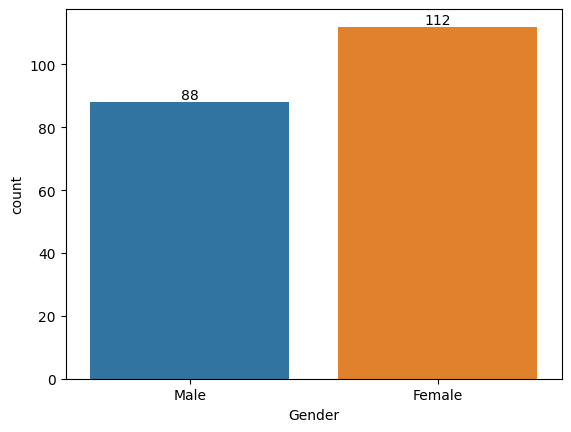

In [9]:
# Analysing number of Males and Females visting the Mall
ax= sns.countplot(x= "Gender", data = df)
for label in ax.containers:
    ax.bar_label(label) 

<Axes: title={'center': 'Age VS Gender'}, xlabel='Gender', ylabel='Age'>

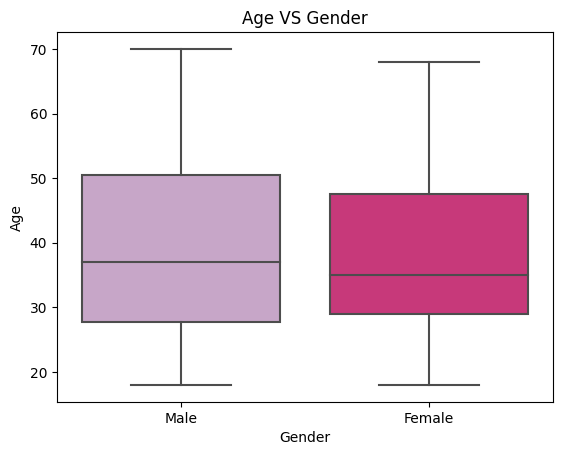

In [10]:
# Analysing the distribution of Age VS 
bx = sns.boxplot(x="Gender", y="Age", data=df, palette="PuRd")
bx.set_title("Age VS Gender")
bx

<Axes: title={'center': 'Gender VS Annual Income'}, xlabel='Gender', ylabel='Annual Income'>

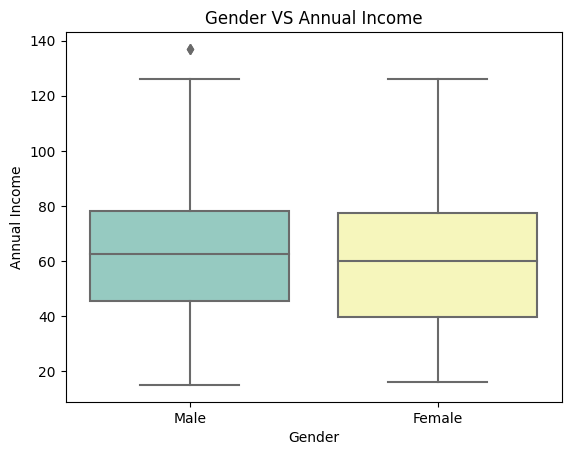

In [11]:
# Analysing the distribution of Gender VS Annual Income
bx = sns.boxplot(x="Gender", y="Annual Income", data=df, palette="Set3")
bx.set_title("Gender VS Annual Income")
bx

<Axes: title={'center': 'Gender VS Spending Score'}, xlabel='Gender', ylabel='Spending Score'>

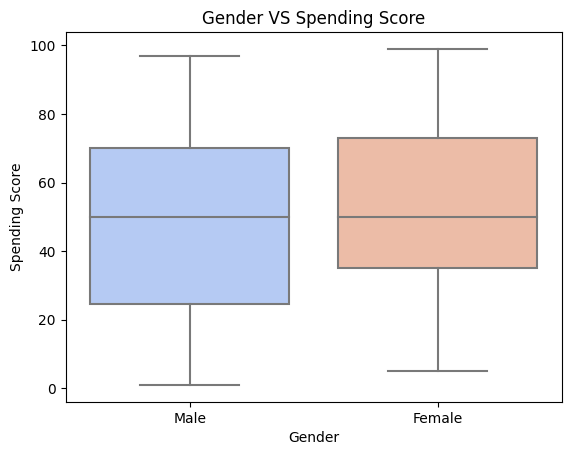

In [12]:
# Analysing the distribution of Gender VS Spending score
dx = sns.boxplot(x="Gender", y="Spending Score", data=df, palette="coolwarm")
dx.set_title("Gender VS Spending Score")
dx

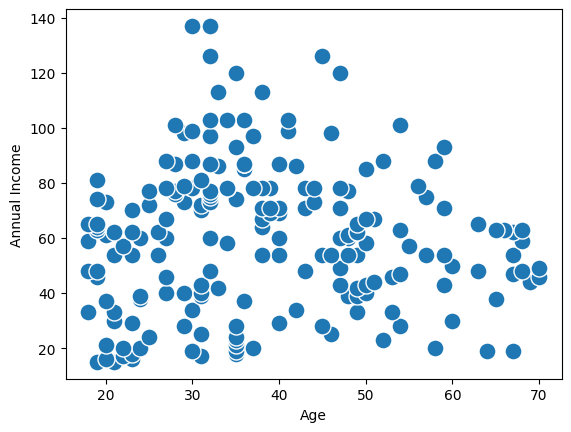

In [13]:
# Analysing relationhip between Age and Annual Income
ex = sns.scatterplot(data = df, x = 'Age', y = 'Annual Income', s = 150)

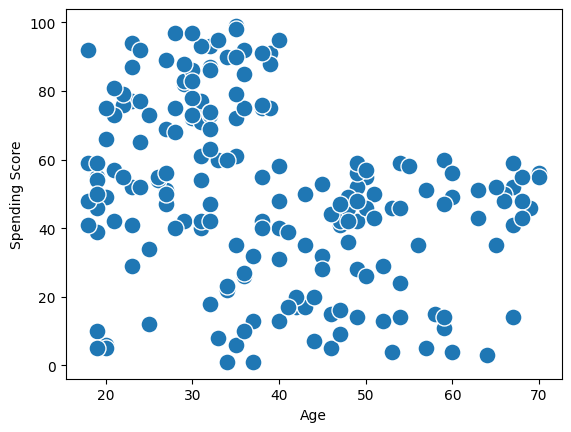

In [14]:
# Analysing relationship between Age and Spending Score
fx = sns.scatterplot(data = df, x = 'Age', y = 'Spending Score', s = 150)

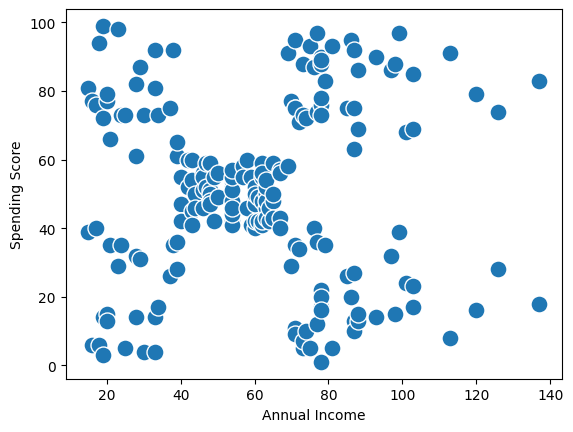

In [15]:
# Analysing relationship between Annual Income and Spending Score
gx = sns.scatterplot(data = df, x = 'Annual Income', y = 'Spending Score', s = 150)

# **Prepare the data**

In [16]:
# Analysing the description of Annual Income and Spending Score
df[['Annual Income', 'Spending Score']].describe().round(2)

,Annual Income,Spending Score
count,200.00,200.00
mean,60.56,50.20
std,26.26,25.82
min,15.00,1.00
25%,41.50,34.75
50%,61.50,50.00
75%,78.00,73.00
max,137.00,99.00


In [17]:
# Standardise the Anuual Income and Spending Score using z-score normalisation
customers_scaled = scaler.fit_transform(df[['Annual Income', 'Spending Score']])

Since the fit_transform method returns a numpy array we transform it into pandas dataframe

In [18]:
# Transforming the results of into Pandas DataFrame
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Annual Income', 'Spending Score'])

In [19]:
# Checking the results and rounding upto 2 decimals
customers_scaled.describe().round(2)

,Annual Income,Spending Score
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


# **Create Clusters using K-means**

In [20]:
# Instantiated a new object in k-means class, 
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

n_init is number of times k-means algorithms should run for different centroids, default being 10
random_state is randome initialising seed which will be used to generate cluster centers to 1,2,3,4 which allows us to reproduce our results

In [21]:
# Clustering our data
km.fit(customers_scaled)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [22]:
# To get cluster assignments referencing labels attribute of km object
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

The result is a numpy array of cluster assignments
The cluster assignments corresponds to order of instances in the customer scale data. So the first item in the data is assigned to cluster zero while the last item is assigned to cluster two

In [23]:
# Total Within Cluster Sum of Squares (WCSS)
km.inertia_

157.70400815035947

# **Evaluate and visualise the clusters**

In [24]:
#To get the number of items in each cluster, we create a pandas series from the NumPy array 
pd.Series(km.labels_).value_counts().sort_index()

0    123
1     38
2     39
Name: count, dtype: int64

We see that the first cluster has 123 customers. The second has 38 customers and the third has 39 customers. The first cluster may need some additional attention. It is possible that our k is not appropriate for this dataset. The center of each cluster also provides us with some useful information about the quality of our clusters. The cluster_centers attribute of our cluster object km provides us with the coordinates of the cluster centers or centroids as a NumPy array.


In [25]:
# Displaying results
km.cluster_centers_

array([[-0.62618966, -0.01439238],
       [ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275]])

To make cluster centers easier to interpret we create a dataframe called cluster_centers_ using Annual Income and Spending Score as the column names. Because we used the z-score approach to normalize our data the x-y coordinates for the average income and spending score will be zero.

In [26]:
# Creating a pandas dataframe for cluster centers
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Annual_Income', 'Spending_Score'])
cluster_centers

,Annual_Income,Spending_Score
0,-0.626190,-0.014392
1,1.009200,-1.225535
2,0.991583,1.239503


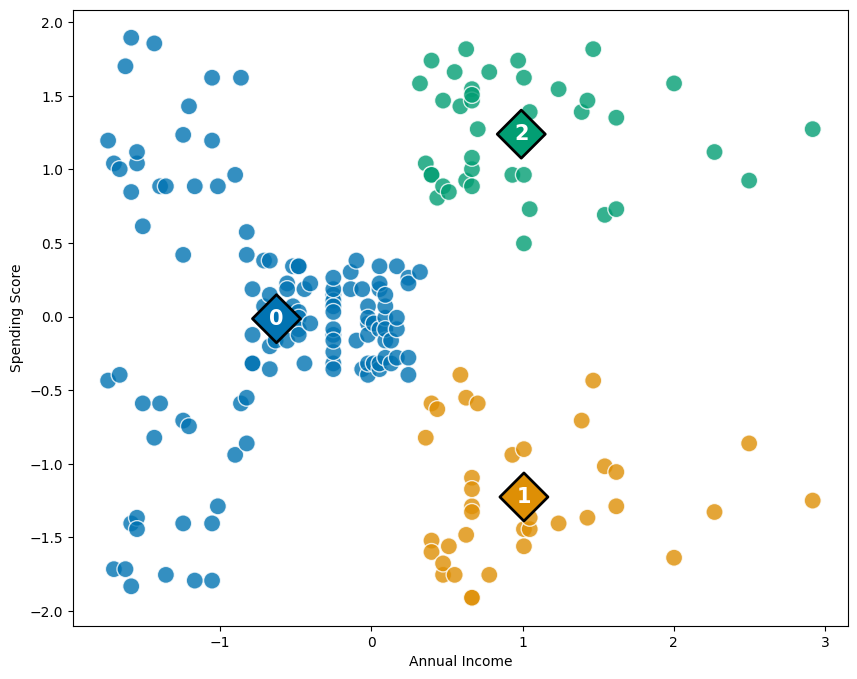

In [27]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled, x = 'Annual Income',
                     y = 'Spending Score', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Annual_Income',
                     y = 'Spending_Score', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Annual_Income[i], 
                        y = cluster_centers.Spending_Score[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

# **Choose right number of clusters**

> ***The Within Cluster Sum of Squares***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


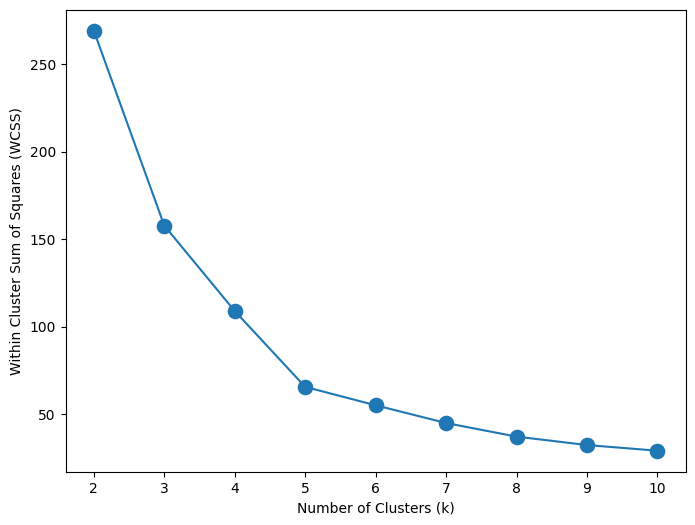

In [28]:
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

wcss_series = pd.Series(wcss, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

> ***The Average Silhouette Score***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


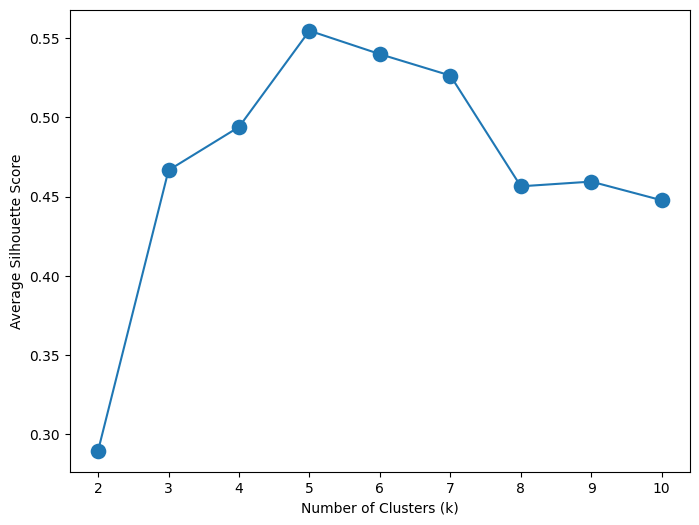

In [29]:
silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))

silhouette_series = pd.Series(silhouette, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

> ***The Calinski Harabasz Score***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


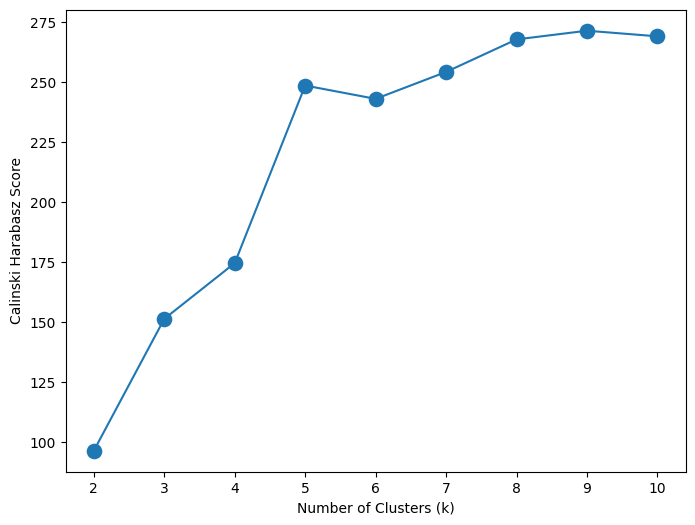

In [30]:
calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

calinski_series = pd.Series(calinski, index = range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

# **Analyse and Interpret the clusters**

In [31]:
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [32]:
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Annual_Income', 'Spending_Score'])
cluster_centers

,Annual_Income,Spending_Score
0,-1.307519,-1.136965
1,1.055003,-1.284439
2,0.991583,1.239503
3,-1.329545,1.132178
4,-0.200913,-0.026456


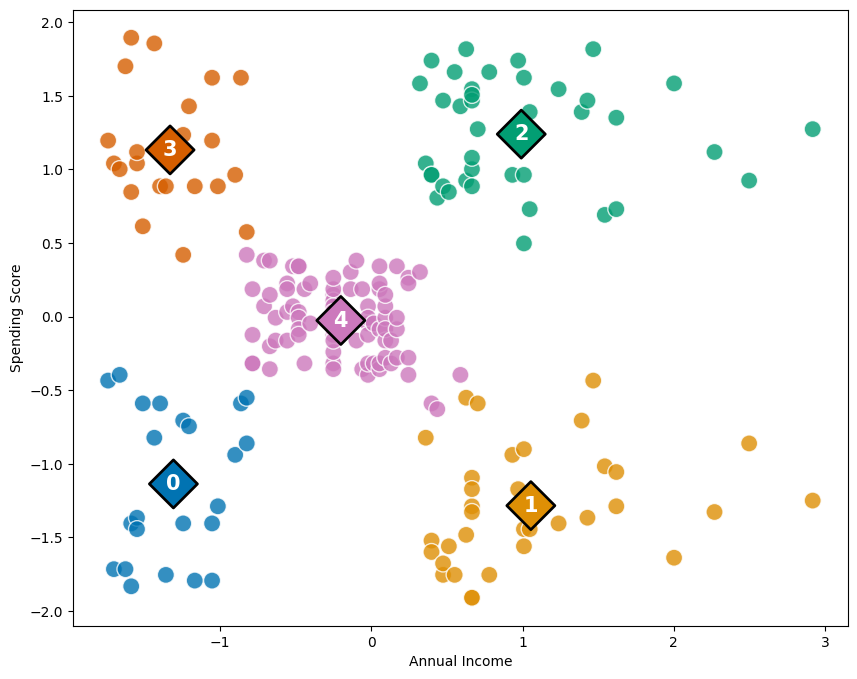

In [33]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = customers_scaled, x = 'Annual Income',
                     y = 'Spending Score', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x ='Annual_Income',
                     y = 'Spending_Score', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Annual_Income[i], 
                        y = cluster_centers.Spending_Score[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [34]:
# Adding a column of cluster to the existing dataset
df['Cluster'] = km.labels_.tolist()
df.head(10)

,CustomerID,Gender,Age,Annual Income,Spending Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
5,6,Female,22,17,76,3
6,7,Female,35,18,6,0
7,8,Female,23,18,94,3
8,9,Male,64,19,3,0
9,10,Female,30,19,72,3


In [35]:
# Dummy code the categorical feature in our dataset that is Gender in our case
df = pd.get_dummies(df, columns = ['Gender'])
df.head(10)

,CustomerID,Age,Annual Income,Spending Score,Cluster,Gender_Female,Gender_Male
0,1,19,15,39,0,False,True
1,2,21,15,81,3,False,True
2,3,20,16,6,0,True,False
3,4,23,16,77,3,True,False
4,5,31,17,40,0,True,False
5,6,22,17,76,3,True,False
6,7,35,18,6,0,True,False
7,8,23,18,94,3,True,False
8,9,64,19,3,0,False,True
9,10,30,19,72,3,True,False


In [36]:
# Frequency Distribution of males and females
df.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Annual Income': 'median',
    'Spending Score': 'median'}).round(2)

Gender_Female      0.56
Gender_Male        0.44
Age               36.00
Annual Income     61.50
Spending Score    50.00
dtype: float64

In [37]:
# Group customer statistics by cluster
df.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Annual Income': 'median',
    'Spending Score': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Annual Income,Spending Score
Cluster,,,,,
0,0.61,0.39,46.0,25.0,17.0
1,0.46,0.54,42.0,85.0,16.0
2,0.54,0.46,32.0,79.0,83.0
3,0.59,0.41,23.5,24.5,77.0
4,0.59,0.41,46.0,54.0,50.0
